In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf

rcParams['figure.figsize'] = [12, 8]
rcParams['figure.dpi'] = 200

In [2]:
df = pd.read_csv('data/H1.csv')
date_index = pd.to_datetime(
    df['ArrivalDateYear'].astype(str) + '-' + \
    df['ArrivalDateMonth'].astype(str) + '-' + \
    df['ArrivalDateDayOfMonth'].astype(str),
    format='%Y-%B-%d')
df.set_index(date_index, inplace=True)
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
2015-07-01,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2015-07-01,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2015-07-01,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
2015-07-01,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
2015-07-01,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [14]:
weekly_data = df[['IsCanceled']].resample('W').sum()
weekly_data['IsCanceled'] = weekly_data['IsCanceled'].astype(float)
weekly_data.head()

,IsCanceled
2015-07-05,49.0
2015-07-12,48.0
2015-07-19,90.0
2015-07-26,74.0
2015-08-02,97.0


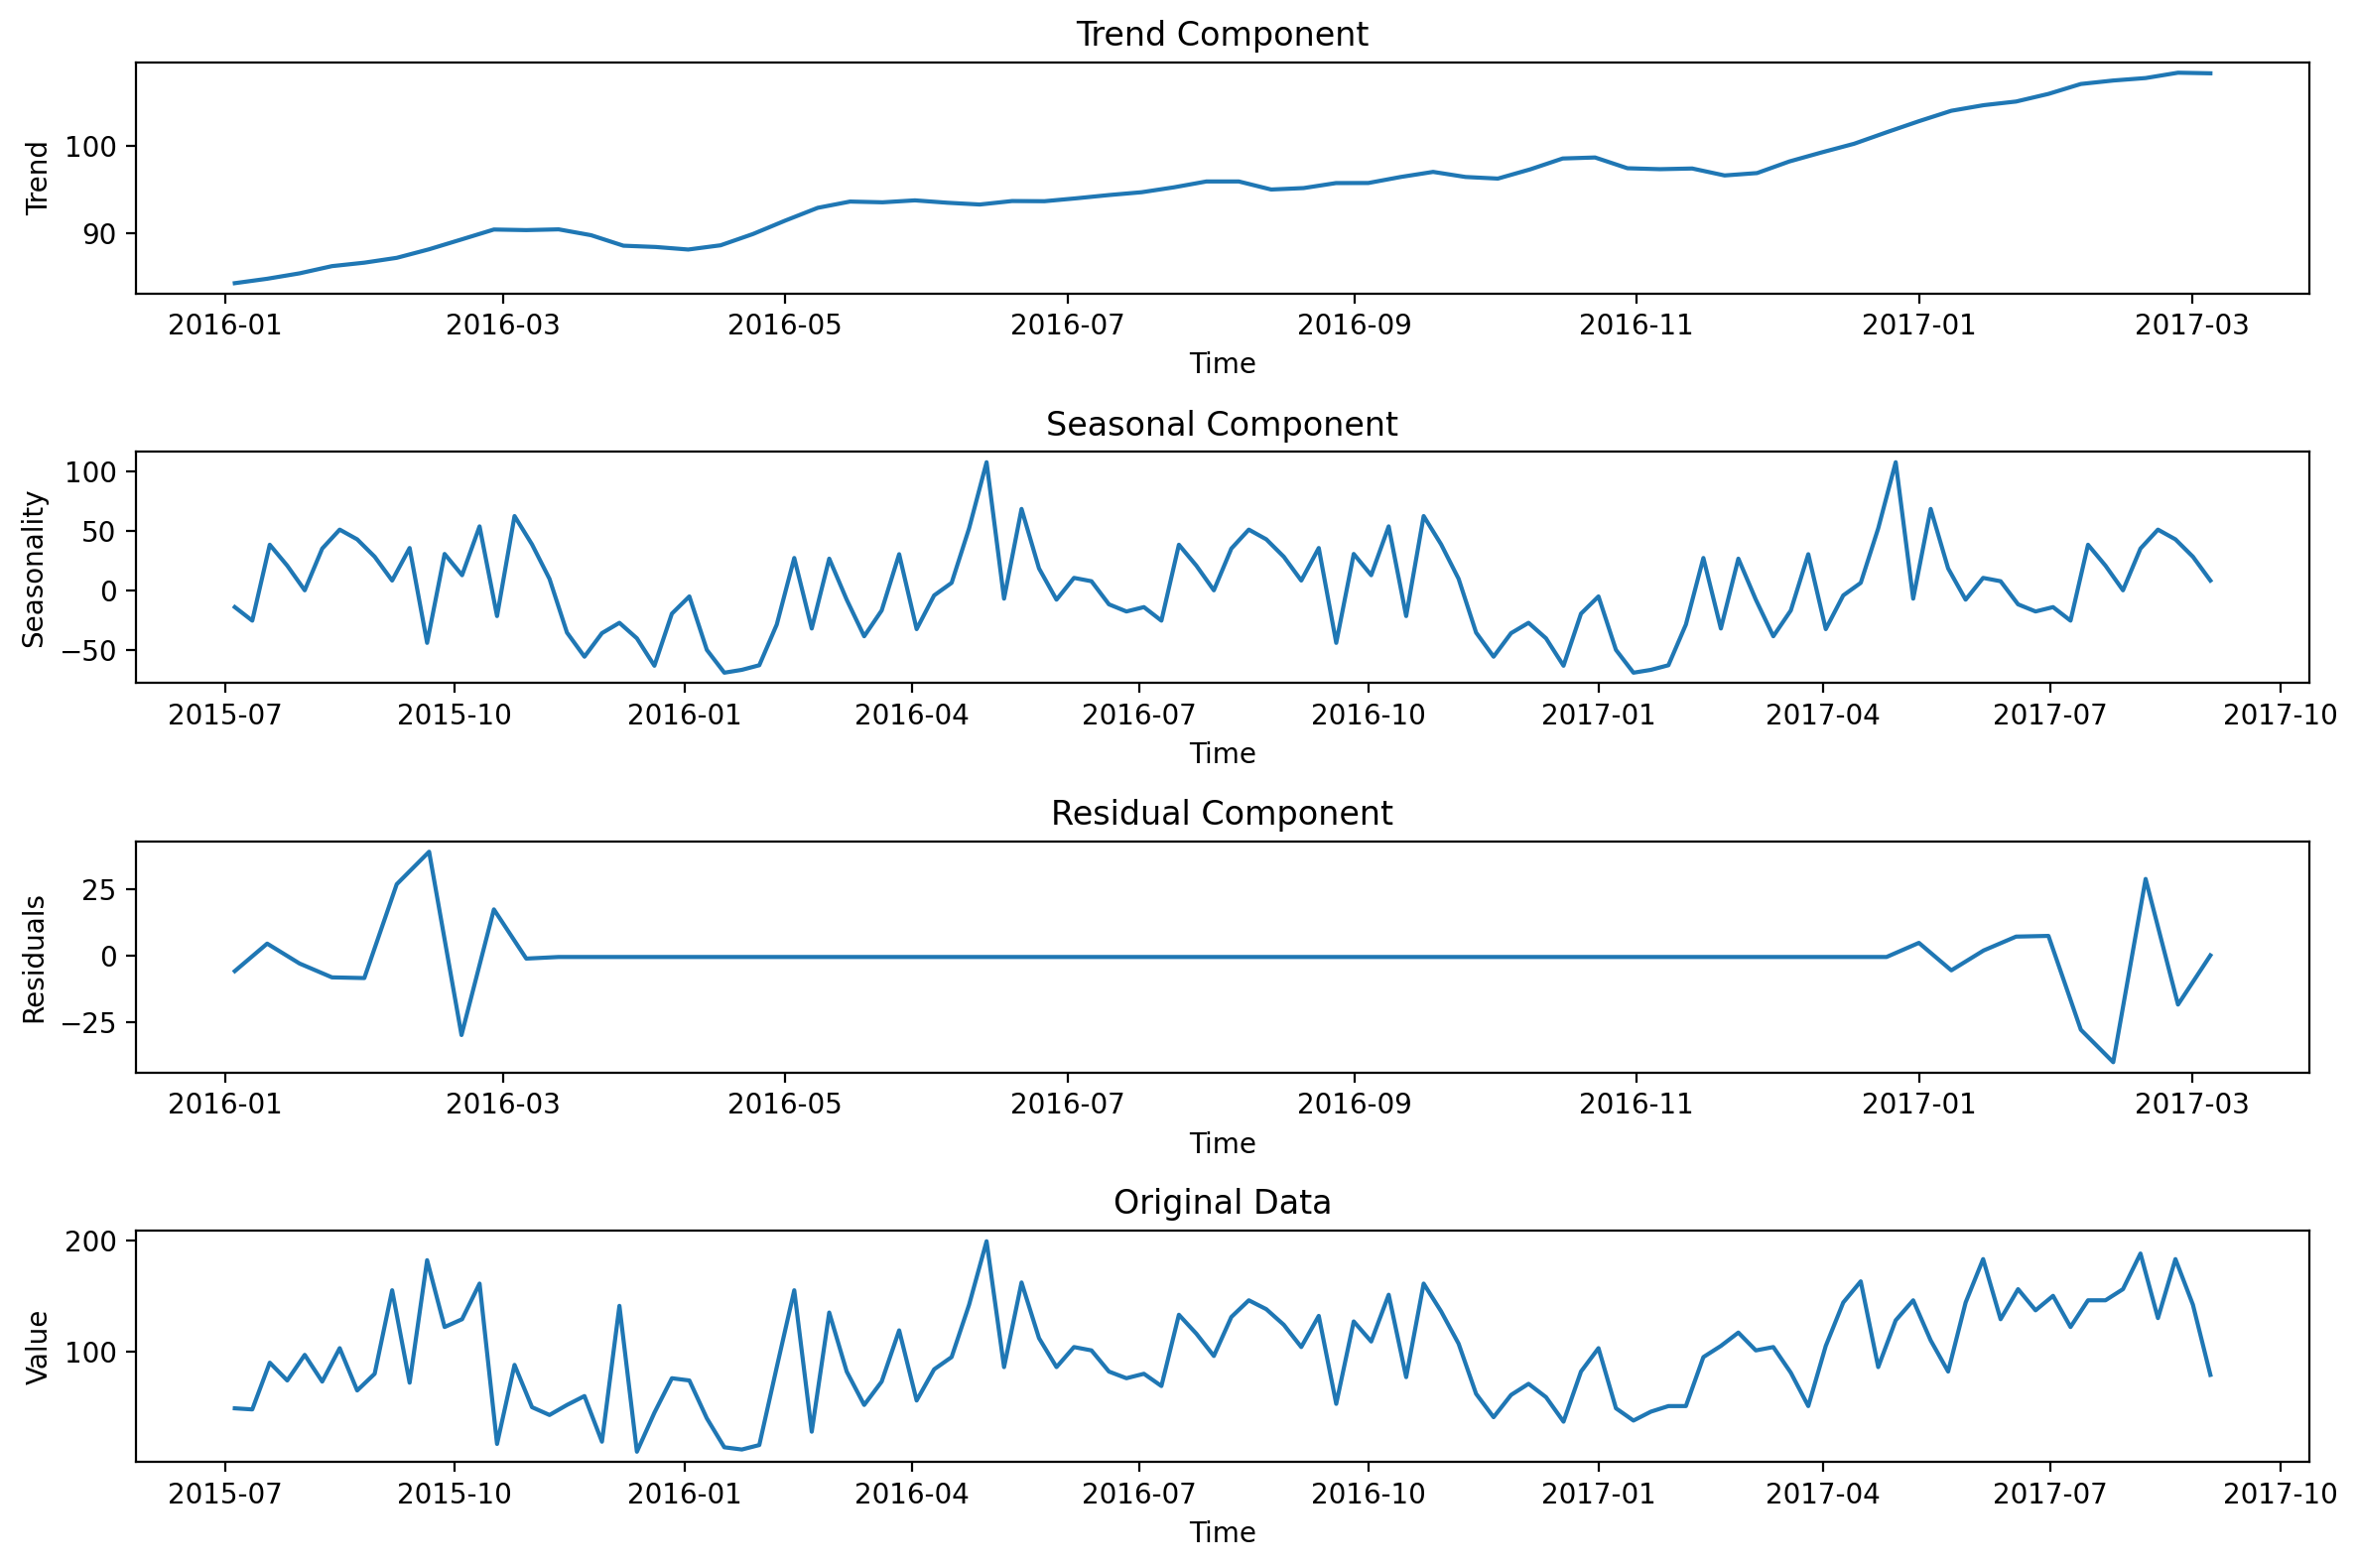

In [15]:
decomposition = seasonal_decompose(weekly_data['IsCanceled'])

# Plot the trend component
plt.subplot(411)
plt.plot(decomposition.trend)
plt.xlabel('Time')
plt.ylabel('Trend')
plt.title('Trend Component')

# Plot the seasonal component
plt.subplot(412)
plt.plot(decomposition.seasonal)
plt.xlabel('Time')
plt.ylabel('Seasonality')
plt.title('Seasonal Component')

# Plot the residual component
plt.subplot(413)
plt.plot(decomposition.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residual Component')

# Plot the original data
plt.subplot(414)
plt.plot(decomposition.observed)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Data')

# Adjust the layout of the plots
plt.tight_layout()

# Display the plots
plt.show()

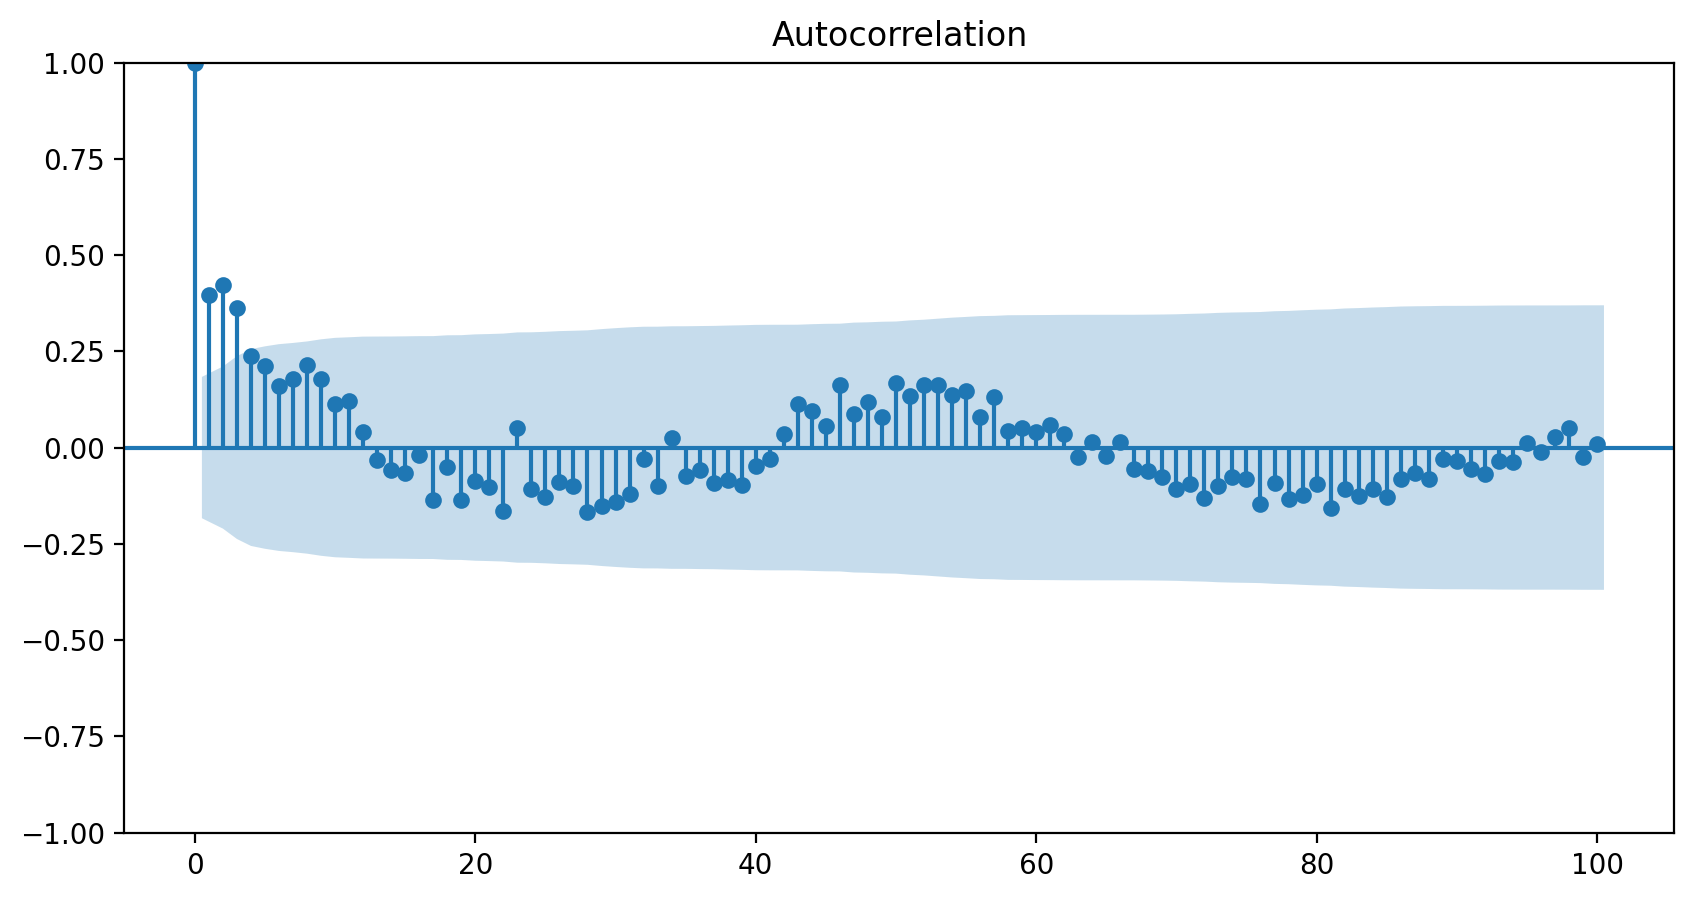

In [16]:
lags = 100  # Set the number of lags to show in the plot
acf_values, conf_int = acf(weekly_data['IsCanceled'], nlags=lags, alpha=0.05)

# Plot the ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(weekly_data['IsCanceled'], lags=lags, alpha=0.05, ax=ax)

# Show the plot
plt.show()

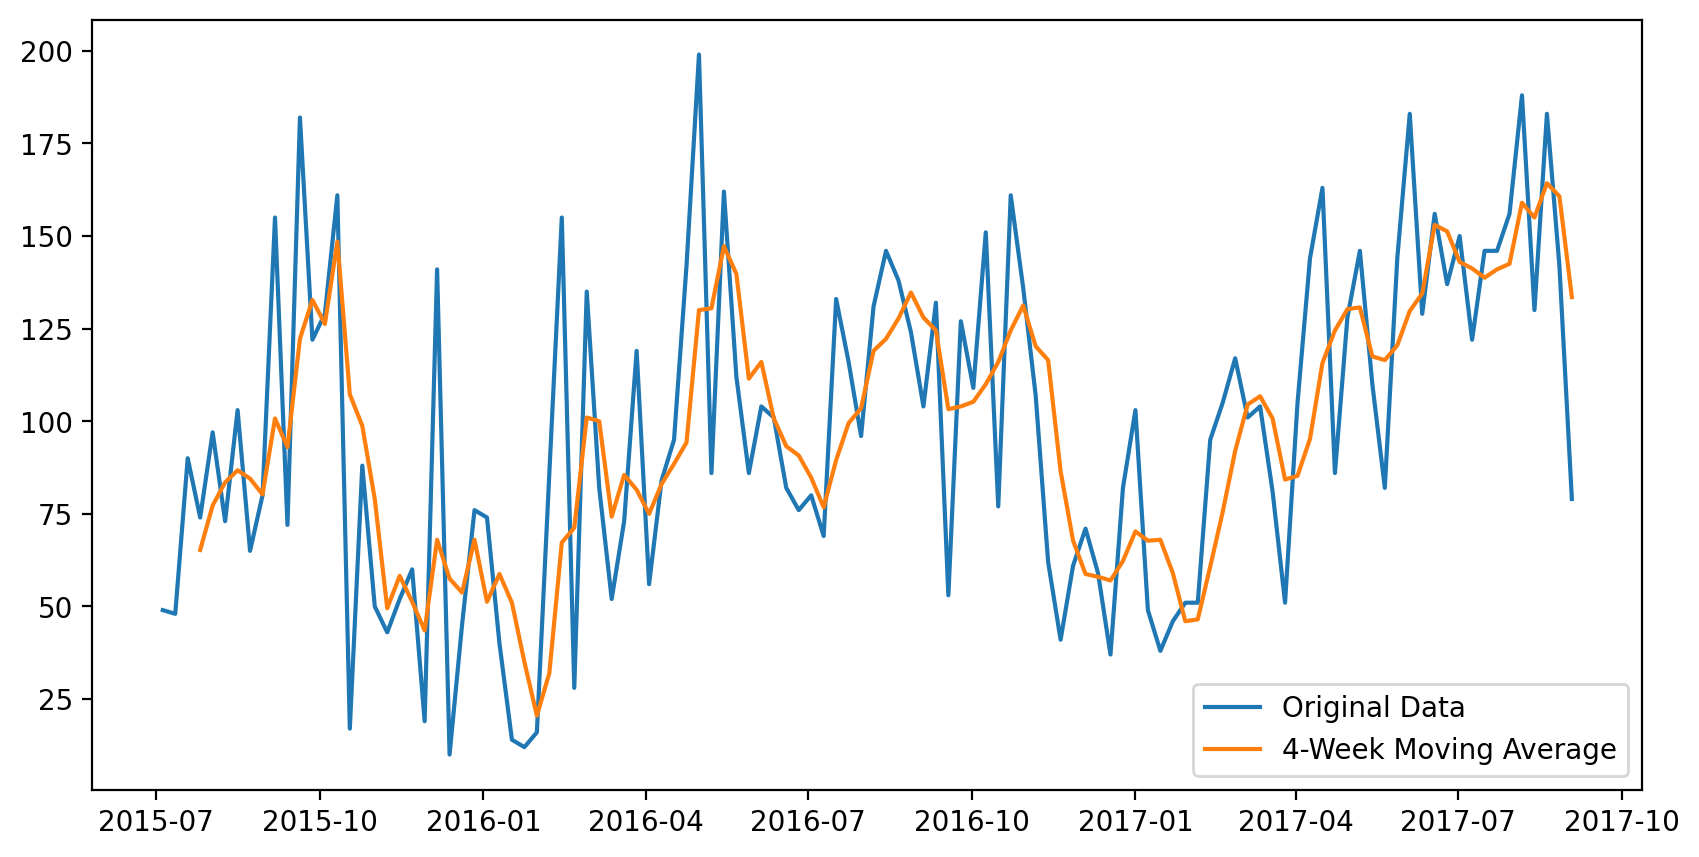

In [17]:
weekly_data['IsCanceledRolling'] = weekly_data['IsCanceled'].rolling(window=4).mean()

_, ax = plt.subplots(figsize=(10, 5))
ax.plot(weekly_data.index, weekly_data['IsCanceled'], label='Original Data')
ax.plot(weekly_data.index, weekly_data['IsCanceledRolling'], label='4-Week Moving Average')
ax.legend()

# Show the plot
plt.show()